In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn import svm

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Finish



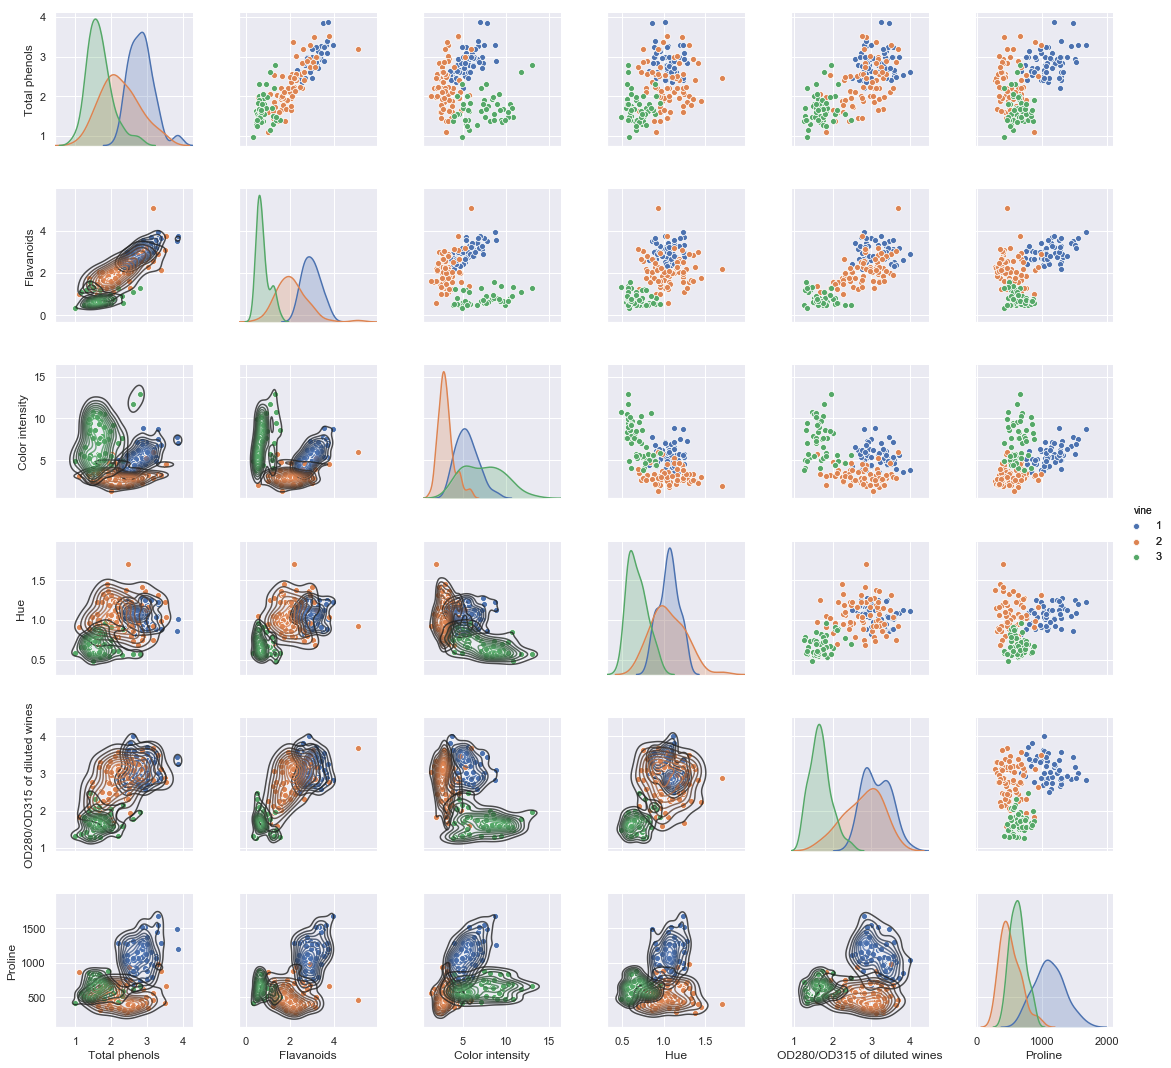

In [3]:
sns.set()
data = pd.read_csv('data.txt')

data.columns = ['vine', 'alcohol', 'malic acid', 'ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
#g = sns.pairplot(data, vars = ['alcohol', 'malic acid', 'Alcalinity of ash', 'Total phenols', 'Flavanoids', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'], hue = 'vine')
best = ['Total phenols', 'Flavanoids', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
#best = ['alcohol', 'malic acid', 'ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
g = sns.pairplot(data, vars = best, hue = 'vine')
#g.map_upper(plt.scatter, alpha=0.8)
g.map_lower(sns.kdeplot, alpha = 0.8)
g.add_legend();
g.savefig('output.png')
print('Finish\n')

      dist                                                          \
     count          mean            std          min           25%   
vine                                                                 
1     58.0  1.295852e+06  513042.758696  462442.5685  972755.81880   
2     71.0  2.942846e+05  187449.952881   77312.8528  165271.45470   
3     48.0  4.098071e+05  149847.223088  172252.1913  297130.49855   

                                                
               50%           75%           max  
vine                                            
1     1.199078e+06  1.638459e+06  2.822511e+06  
2     2.450435e+05  3.906554e+05  9.702694e+05  
3     3.938067e+05  4.830976e+05  7.744636e+05  


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


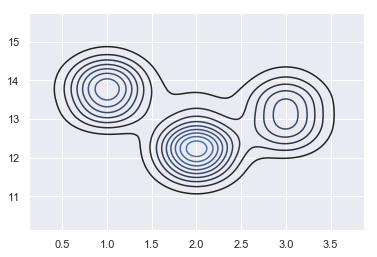

In [6]:
dist = np.zeros(data.shape[0])
weight = np.ones(len(best))
k = 0
for i in best:
    dist += (data[i] * weight[k]) ** 2
    k += 1
res = pd.DataFrame({'vine': data['vine'], 'dist': dist})
print(res.groupby('vine').describe())
sns.kdeplot(data)

In [24]:
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(data.loc[:, data.columns != 'vine'][0::2], data['vine'][0::2])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
pred = clf.predict(data.loc[:, data.columns != 'vine'][1::2])
truth = data['vine'].values.reshape(1, data.shape[0])[0][1::2]
print('Prediction:\n', pred)
print('Ground truth:\n', truth)
diff = (pred == truth)
print('Precision:', diff.sum(), 'of', len(truth), '(', diff.sum() / len(truth) * 100 ,'%)')

Prediction:
 [1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 3 2 2 1 1 2 3
 2 1 2 2 3 2 2 2 2 2 3 2 3 2 2 2 2 3 3 2 2 2 3 2 2 2 2 3 3 2 2 2 3 3 1 2 3
 2 2 3 3 3 3 3 3 3 1 2 2 1 3]
Ground truth:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
Precision: 63 of 88 ( 71.5909090909091 %)


In [137]:
initial = data[data.columns.difference(['vine'])][0::2]
learn = data[data.columns.difference(['vine'])][1::2]
pred = np.zeros(learn.shape[0])
for i in range(len(learn)):
    #distances to each point of initial set
    dist = np.zeros(initial.shape[0])
    for j in range(len(initial)):
        dist[j] = np.sum((initial.values[j] - learn.values[i]) ** 2)
    knn = data['vine'][dist.argsort()[0:10]]
    #print(knn.groupby('a').describe())
    #print(knn)
#print(pred.shape, pred)
#print(truth.shape, truth)
#diff = (pred == truth)
#print('Precision:', diff.sum(), 'of', len(truth), '(', diff.sum() / len(truth) * 100 ,'%)')

a   NaN
Name: vine, dtype: float64
a   NaN
Name: vine, dtype: float64
a   NaN
Name: vine, dtype: float64
a   NaN
Name: vine, dtype: float64
a   NaN
Name: vine, dtype: float64
a   NaN
Name: vine, dtype: float64
a   NaN
Name: vine, dtype: float64
a   NaN
Name: vine, dtype: float64
a   NaN
Name: vine, dtype: float64
a   NaN
Name: vine, dtype: float64
a   NaN
Name: vine, dtype: float64
a   NaN
Name: vine, dtype: float64
a   NaN
Name: vine, dtype: float64
a   NaN
Name: vine, dtype: float64
a   NaN
Name: vine, dtype: float64
a   NaN
Name: vine, dtype: float64
a   NaN
Name: vine, dtype: float64
a   NaN
Name: vine, dtype: float64
a   NaN
Name: vine, dtype: float64
a   NaN
Name: vine, dtype: float64
a   NaN
Name: vine, dtype: float64
a   NaN
Name: vine, dtype: float64
a   NaN
Name: vine, dtype: float64
a   NaN
Name: vine, dtype: float64
a   NaN
Name: vine, dtype: float64
a   NaN
Name: vine, dtype: float64
a   NaN
Name: vine, dtype: float64
a   NaN
Name: vine, dtype: float64
a   NaN
Name: vine, 